# BIG DATA ANALYTICS: Clustering using Scikit-learn
- Scikit learn 라이브러리를 활용한 K-means, DBSCAN 알고리즘을 활용해 보겠습니다.
---

In [1]:
import sys
!{sys.executable} -m pip install sklearn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2f494265e0f65dae2b562035c8fe4592fd0ece30a673f40f312e24095406b2e5
  Stored in directory: /private/var/folders/z1/tt74fn0s6_g8h3tksjv6wwl00000gn/T/pip-ephem-wheel-cache-qhr0y56z/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 1. K-means 클러스터링

## 1-1. 1 차원 클러스터링
차원은 feature의 갯수를 의미

In [3]:
X = np.array([[1], [2], [4], [8], [9], [11]])

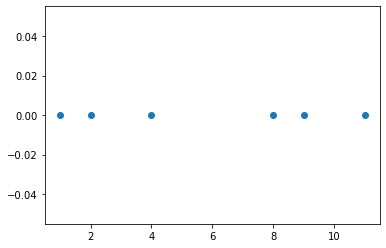

In [4]:
plt.scatter(X[:],np.zeros(X.shape[0]), label='True Position')

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("Labels: ",kmeans.labels_)
print("Predicted Labels: ",kmeans.predict([[10], [1.5]]))
print("Centroids: \n", kmeans.cluster_centers_)

Labels:  [1 1 1 0 0 0]
Predicted Labels:  [0 1]
Centroids: 
 [[9.33333333]
 [2.33333333]]


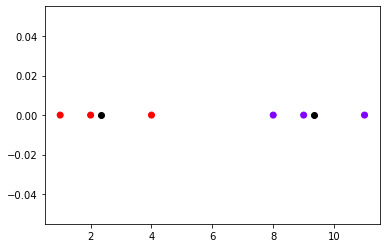

In [6]:
plt.scatter(X[:],np.zeros(X.shape[0]), c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:],np.zeros(kmeans.cluster_centers_.shape[0]), color='black')

## 1-2. 2 차원 클러스터링

In [7]:
X = np.array([[1, 2], [1.5, 4], [2, 0],
              [8, 2], [8.5, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("Labels: ",kmeans.labels_)
print("Predicted Labels: ",kmeans.predict([[0, 0], [12, 3]]))
print("Centroids: \n", kmeans.cluster_centers_)

Labels:  [1 1 1 0 0 0]
Predicted Labels:  [1 0]
Centroids: 
 [[8.83333333 2.        ]
 [1.5        2.        ]]


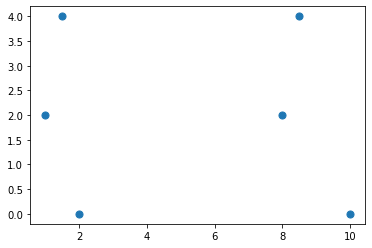

In [8]:
plt.scatter(X[:,0],X[:,1], label='True Position',s=50)

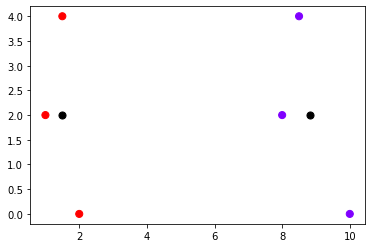

In [9]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow' , s=50)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',s=50)

## 1-3. 3 차원 클러스터링

In [10]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [11]:
X = np.array([[1, 2, 1], [1,3,1.5], [1.5, 2.5, 1.8],
              [10, 10.4, 13], [10.5,13.2,14], [12, 14.4, 15],
              [20, 20.1, 22], [19,24,18], [23, 23, 25],
              ])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print("Labels: ",kmeans.labels_)
print("Predicted Labels: ",kmeans.predict([[4, 4, 4], [12, 12, 12], [25,25,25]]))
print("Centroids: \n", kmeans.cluster_centers_)

Labels:  [2 2 2 0 0 0 1 1 1]
Predicted Labels:  [2 0 1]
Centroids: 
 [[10.83333333 12.66666667 14.        ]
 [20.66666667 22.36666667 21.66666667]
 [ 1.16666667  2.5         1.43333333]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


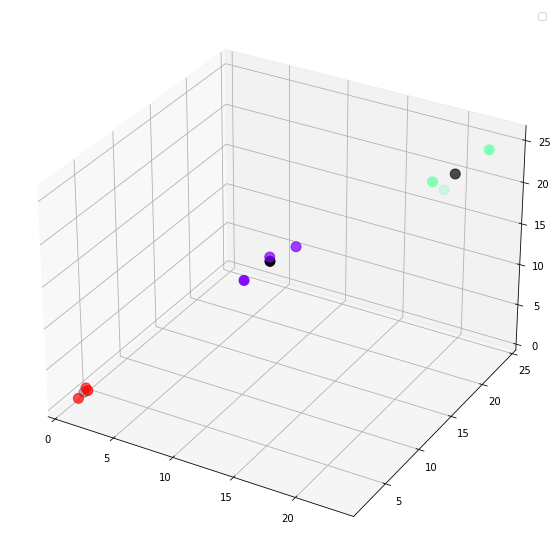

In [12]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=kmeans.labels_ , cmap='rainbow', s=100)
ax.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color='black',s=100)

ax.legend()

# 2. 밀도 기반 클러스터링 (DBSCAN)

In [13]:
from sklearn.datasets import make_circles, make_moons
n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)


In [14]:
X1.shape

(1000, 2)

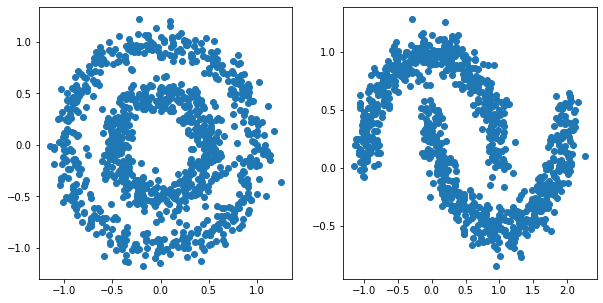

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X1[:,0], X1[:,1])
ax2.scatter(X2[:,0], X2[:,1])

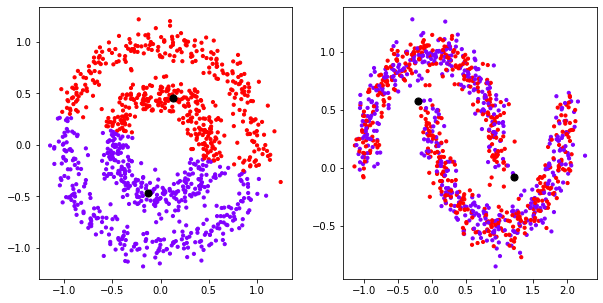

In [16]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(X1)
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X1[:,0], X1[:,1],c=kmeans1.labels_, cmap='rainbow' , s=10)
ax1.scatter(kmeans1.cluster_centers_[:,0] ,kmeans1.cluster_centers_[:,1], color='black',s=50)
ax2.scatter(X2[:,0], X2[:,1],c=kmeans1.labels_, cmap='rainbow' , s=10)
ax2.scatter(kmeans2.cluster_centers_[:,0] ,kmeans2.cluster_centers_[:,1], color='black',s=50)

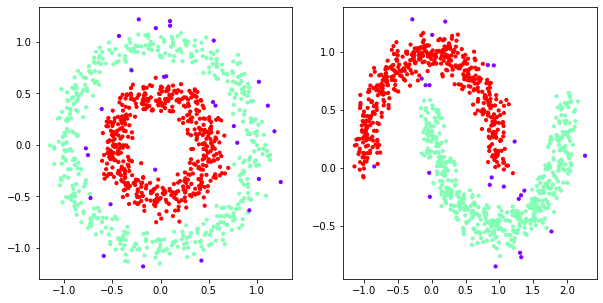

In [18]:
from sklearn.cluster import DBSCAN
dbscans1 = DBSCAN(eps=0.1).fit(X1)
dbscans2 = DBSCAN(eps=0.1).fit(X2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X1[:,0], X1[:,1],c=dbscans1.labels_, cmap='rainbow' , s=10)
ax2.scatter(X2[:,0], X2[:,1],c=dbscans2.labels_, cmap='rainbow' , s=10)